# Hidden Markov Model

1. [Dice](#1.-Dice)<br/>
    1.1. [Evaluation](#1.1.-Evaluation)<br/>
    1.2. [Decoding](#1.2.-Decoding)<br/>
    1.3. [Learning](#1.3.-Learning)<br/>
    1.4. [Predict](#1.4.-Predict)
2. [HAR with HMM](#2.-HAR-with-HMM)<br/>
    2.1. [Using Segments](#2.1.-Using-Segments)<br/>
    2.2. [Using Sliding Window](#2.2.-Using-Sliding-Window)
3. [Flip Coin](#3.-Flip-Coin)

In [1]:
from collections import defaultdict
import math
import random
import pickle

from hmmlearn.hmm import MultinomialHMM, GaussianHMM
from hmmlearn.base import ConvergenceMonitor
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.stride_tricks import as_strided as ast
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

from visualize import plot_confusion_matrix

%matplotlib inline
plt.style.use('seaborn-white')

## 1. Dice

### 1.1. Evaluation
Probability of given observation with given model

In [2]:
hmm = MultinomialHMM(n_components=2)  # [FAIR, LOADED]

# Num of observations
hmm.n_features = 6

# Model (Start probability, transition probability, emission probability)
hmm.startprob_ = [0.5, 0.5]
hmm.transmat_ = [
    [0.95, 0.05],
    [0.05, 0.95],
]
hmm.emissionprob_ = [
    [ 1/6,  1/6,  1/6,  1/6,  1/6, 1/6],
    [1/10, 1/10, 1/10, 1/10, 1/10, 1/2],
]

In [3]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [4]:
# Evaluation
hmm.score(X) # return log(probability)

-71.28707008782621

#### # Exercise
Write your code in the cells below. (8min)
1. Change Observations
2. Evaluate the probability
3. Repeat 1~2 with different observations

In [5]:
# 1. Change Observations



# 2. Evaluate the probability



# 3. Repeat 1~2 with different observations




### 1.2. Decoding
Most likely sequence of states with given observations and model

In [6]:
hmm = MultinomialHMM(n_components=2)  # [FAIR, LOADED]

# Num of observations
hmm.n_features = 6

# Model (Start probability, transition probability, emission probability)
hmm.startprob_ = [0.5, 0.5]
hmm.transmat_ = [
    [0.95, 0.05],
    [0.05, 0.95],
]
hmm.emissionprob_ = [
    [ 1/6,  1/6,  1/6,  1/6,  1/6, 1/6],
    [1/10, 1/10, 1/10, 1/10, 1/10, 1/2],
]

In [7]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [8]:
# Decoding
hmm.decode(X)

(-74.25710830623268,
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1]))

#### # Exercise
Write your code in the cells below. (8min)
1. Change Observations
2. Decode the observations
3. Repeat 1~2 with different observations

In [9]:
# 1. Change Observations



# 2. Decode the observations



# 3. Repeat 1~2 with different observations




## 1.3. Learning
Most likely model with given observations

In [10]:
hmm = MultinomialHMM(n_components=2, verbose=True, n_iter=20)

In [11]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [12]:
# Learning
hmm.fit(X)

         1         -74.3889             +nan
         2         -67.0778          +7.3111
         3         -66.9058          +0.1720
         4         -66.8014          +0.1044
         5         -66.6985          +0.1029
         6         -66.5829          +0.1156
         7         -66.4491          +0.1338
         8         -66.2926          +0.1565
         9         -66.1100          +0.1826
        10         -65.9007          +0.2093
        11         -65.6699          +0.2308
        12         -65.4301          +0.2398
        13         -65.1991          +0.2310
        14         -64.9917          +0.2074
        15         -64.8127          +0.1790
        16         -64.6566          +0.1560
        17         -64.5139          +0.1427
        18         -64.3763          +0.1376
        19         -64.2396          +0.1367
        20         -64.1036          +0.1360


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=2,
               n_iter=20, params='ste',
               random_state=<mtrand.RandomState object at 0x7f9aac09ef78>,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0, verbose=True)

#### 1.3.1. Inside of the Trained Model

In [13]:
hmm.emissionprob_

array([[6.46663450e-01, 2.84508658e-04, 1.73024681e-01, 6.16045888e-02,
        5.53561416e-02, 6.30666304e-02],
       [9.25311450e-05, 1.01407515e-01, 7.87088816e-02, 1.37020160e-01,
        3.87338495e-02, 6.44037063e-01]])

In [14]:
hmm.startprob_

array([1.00000000e+00, 1.82557086e-41])

In [15]:
hmm.transmat_

array([[0.04493824, 0.95506176],
       [0.46750093, 0.53249907]])

### 1.4. Predict
Predict next observations and states

In [16]:
X, Z = hmm.sample(n_samples=10)
X, Z

(array([[0],
        [5],
        [5],
        [5],
        [2],
        [3],
        [0],
        [5],
        [0],
        [1]]), array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1]))

---
## 2. HAR with HMM
### 2.1. Using Segments
#### 2.1.1. Load data

In [17]:
with open('Data/HAR_segments_for_HMM.pkl', 'rb') as f:
    X, y = pickle.load(f)

print(type(X), type(y), len(X), len(y))
print(type(X[0]), X[0].shape, set(y))

<class 'list'> <class 'list'> 30 30
<class 'numpy.ndarray'> (3072, 3) {'walking', 'running', 'standing'}


#### 2.1.2. Plot data

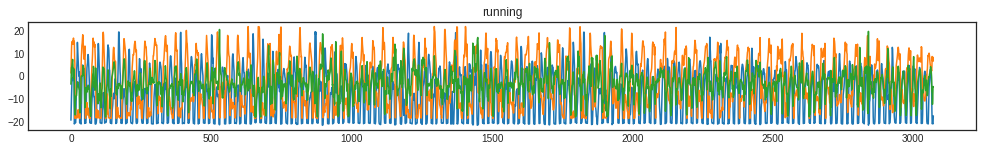

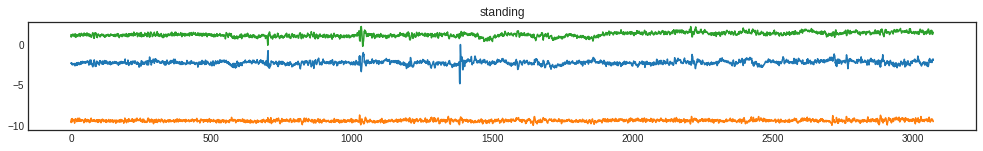

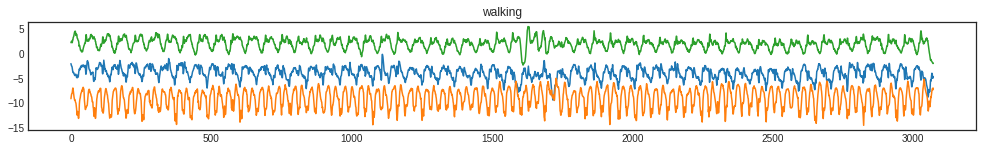

In [18]:
plt.rcParams['figure.figsize'] = (17, 2)

plt.title(y[0])
plt.plot(X[0])
plt.show()

plt.title(y[10])
plt.plot(X[10])
plt.show()

plt.title(y[20])
plt.plot(X[20])
plt.show()

#### 2.1.3. Map Label

In [19]:
# Mapping label
classes = sorted(list(set(y)))
class_to_index = {c:i for i, c in enumerate(classes)}
index_to_class = {i:c for i, c in enumerate(classes)}
print(class_to_index)

{'running': 0, 'standing': 1, 'walking': 2}


#### 2.1.4. Train Model
To fit with multiple observations, hmmlearn provides `hmm.fit(X_concat, lengths)`

In [20]:
# Make HMM models per motion classes
hmms = [GaussianHMM(n_components=5, n_iter=30) for c in classes]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Process training data
X_train_dict = defaultdict(lambda: [])
lengths_dict = defaultdict(lambda: [])
for segment, motion in zip(X_train, y_train):
    X_train_dict[motion].append(segment)
    lengths_dict[motion].append(segment.shape[0])

# Fit HMM models per motion classes
for motion in classes:
    X_concat = np.vstack(X_train_dict[motion])
    lengths = lengths_dict[motion]
    
    hmms[class_to_index[motion]].fit(X_concat, lengths)

#### 2.1.5. Test Model

In [21]:
def _predict(segment):
    '''
    Evaluate with multiple HMMs (HMM model per motion class)
    Choose most likely motion class
    '''
    probs = [hmm.score(segment) for hmm in hmms]
    index = np.argmax(probs)
    return index_to_class[index]

def predict(segments):
    return [_predict(segment) for segment in segments]
    
y_pred = predict(X_test)
y_true = y_test

              precision    recall  f1-score   support

     running       1.00      1.00      1.00         3
    standing       1.00      0.33      0.50         3
     walking       0.60      1.00      0.75         3

    accuracy                           0.78         9
   macro avg       0.87      0.78      0.75         9
weighted avg       0.87      0.78      0.75         9



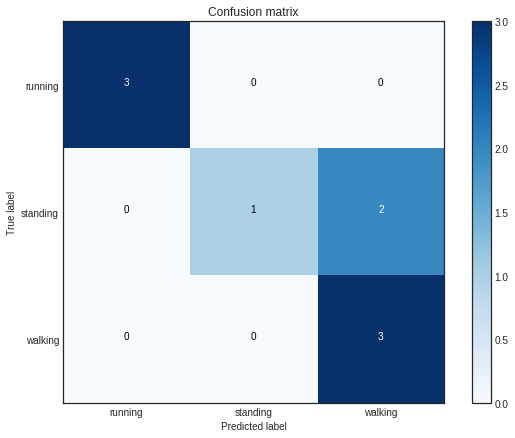

In [22]:
print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred, classes)

### 2.2. Using Sliding Window

#### 2.2.1. Load data

In [23]:
with open('Data/HAR_slices_for_HMM.pkl', 'rb') as f:
    X, y = pickle.load(f)
print(type(X), type(y), len(X), len(y))
print(type(X[0]), X[0].shape, set(y))

<class 'list'> <class 'list'> 2940 2940
<class 'numpy.ndarray'> (150, 3) {'walking', 'running', 'standing'}


#### 2.2.2. Plot data

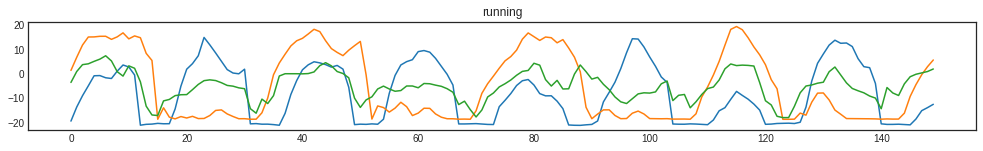

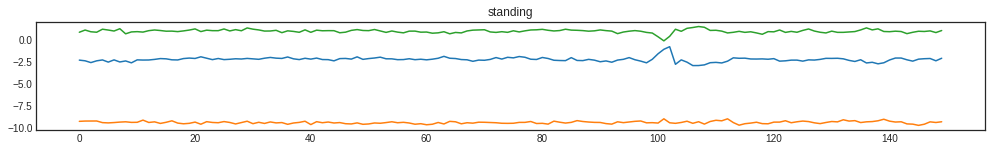

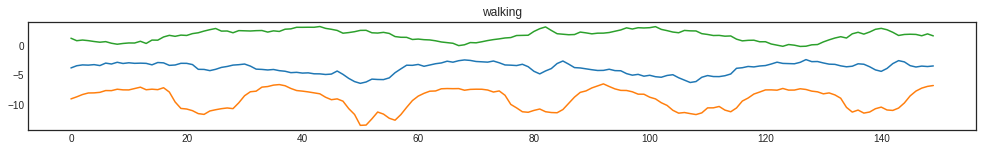

In [24]:
plt.rcParams['figure.figsize'] = (17, 2)

plt.title(y[0])
plt.plot(X[0])
plt.show()

plt.title(y[1000])
plt.plot(X[1000])
plt.show()

plt.title(y[2000])
plt.plot(X[2000])
plt.show()

#### 2.2.3. Map Label

In [25]:
# Mapping label
classes = sorted(list(set(y)))
class_to_index = {c:i for i, c in enumerate(classes)}
index_to_class = {i:c for i, c in enumerate(classes)}
print(class_to_index)

{'running': 0, 'standing': 1, 'walking': 2}


#### 2.2.4. Train Model
To fit with multiple observations, hmmlearn provides `hmm.fit(X_concat, lengths)`

In [26]:
# Make HMM models per motion classes
hmms = [GaussianHMM(n_components=5, n_iter=30)
        for c in classes]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Process training data
X_train_dict = defaultdict(lambda: [])
lengths_dict = defaultdict(lambda: [])
for slide, motion in zip(X_train, y_train):
    X_train_dict[motion].append(slide)
    lengths_dict[motion].append(slide.shape[0])

# Fit HMM models per motion classes
for motion in classes:
    X_concat = np.vstack(X_train_dict[motion])
    lengths = lengths_dict[motion]
    
    hmms[class_to_index[motion]].fit(X_concat, lengths)

#### 2.2.5. Test Model

In [27]:
def _predict(slide):
    '''
    Evaluate with multiple HMMs (HMM model per motion class)
    Choose most likely motion class
    '''
    probs = [hmm.score(slide) for hmm in hmms]
    index = np.argmax(probs)
    return index_to_class[index]

def predict(slides):
    return [_predict(slide) for slide in slides]
    
y_pred = predict(X_test)
y_true = y_test

              precision    recall  f1-score   support

     running       1.00      1.00      1.00       245
    standing       1.00      1.00      1.00       245
     walking       1.00      1.00      1.00       245

    accuracy                           1.00       735
   macro avg       1.00      1.00      1.00       735
weighted avg       1.00      1.00      1.00       735



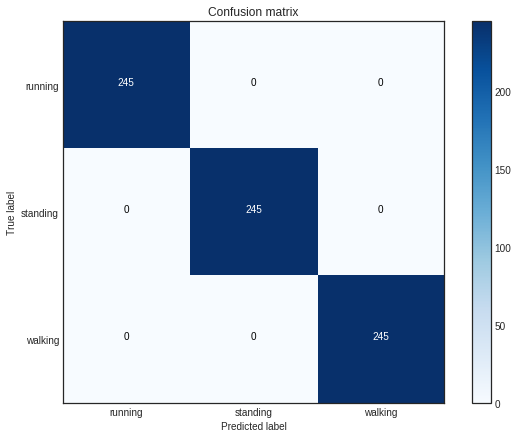

In [28]:
print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred, classes)

## 3. Flip Coin
There are two coins, FAIR and LOADED.<br/>
Problem modeling is given in the next cell.

### Modeling

In [29]:
hmm = MultinomialHMM(n_components=2)  # [FAIR, LOADED]

# Num of observations (Front, Back)
hmm.n_features = 2

# Model (Start probability, transition probability, emission probability)
hmm.startprob_ = [0.2, 0.8]
hmm.transmat_ = [
    [0.7, 0.3],
    [0.3, 0.7],
]
hmm.emissionprob_ = [
    [0.5, 0.5],
    [0.8, 0.2],
]

In [30]:
# Observations
X = np.array([0, 1]).reshape(-1,1)

### 3.1. Evaluation

In [31]:
# Evaluation
hmm.score(X) # return log(probability)

-1.4845689303882308

#### # Exercise - Evaluation
Calculate probability of given sequence with our own hands.

### 3.2. Decoding

In [32]:
# Decoding
hmm.decode(X)

(-2.3434070875143007, array([1, 0]))

#### # Exercise - Decoding
Estimate most likely sequence of states with given observations and model with our own hands.